<a href="https://colab.research.google.com/github/Marc-Elie210/My_Basic_Python/blob/master/Diabetes_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#By: Marc-Elie Cheriza


#Objective:
### Data: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#
Your goal is to make a classification model that can be used to predict something within the dataset.

For example, you can choose to predict whether a patient is likely to be a readmit in the hospital within 30days.

You can choose which features to use in your model (race, gender, age, etc.) and train your model.

Your project should include a description of what you’re trying to accomplish, EDA, data wrangling, model creation, model evaluations, and model selections. 
Your analytics should include at least 2 different types of models (i.e. KNN and Random Forest).


#Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Let's take a look at our dataset

In [ ]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Diabetes Project/Data/diabetic_data.csv')  # loading in the data


In [ ]:
diabetes_data.head() 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
diabetes_data.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#It seems we have many columns/variables but what do they all mean? Are they necessary for our analysis? 
### Here's a list of the columns and what they mean: https://www.hindawi.com/journals/bmri/2014/781670/tab1/
* Encounter ID: Unique identifier of an encounter, Numeric 

* Patient number: Unique identifier of a patient, Numeric	

* Race:	Values: Caucasian, Asian, African American, Hispanic, and other, Nominal 

* Gender: Values: male, female, and unknown/invalid, Nominal 

* Age: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100), Nominal

* Weight: Weight in pounds, Numeric

* Admission_type_ID: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available, Nominal

* Discharge disposition_ID: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available, Nominal

* Admission source:	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital, Nominal

* Time in hospital: Integer number of days between admission and discharge, Numeric

* Payer code:	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay, Nominal

* Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon,  Nominal

* Number of lab procedures:  Number of lab tests performed during the encounter, Numeric

* Number of procedures: Number of procedures (other than lab tests) performed during the encounter, Numeric

* Number of medications: Number of distinct generic names administered during the encounter, Numeric

* Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter, Numeric

* Number of emergency visits:	Number of emergency visits of the patient in the year preceding the encounter, Numeric

* Number of inpatient visits:	Number of inpatient visits of the patient in the year preceding the encounter, Numeric

* Diagnosis 1:	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values, Nominal

* Diagnosis 2:	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values, Nominal

* Diagnosis 3:	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values, Nominal

* Number of diagnoses: Number of diagnoses entered to the system, Numeric

* Glucose serum test result: 	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured	0%
A1c test result	Nominal	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured, Nominal

* Change of medications: Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”, Nominal

* Diabetes medications: Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”, Nominal

* 24 features for medications: For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed, Nominal

* Readmitted:	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission, Nominal

# Any missing data?


In [ ]:
# Checking for null values using .isnull()

diabetes_data.isnull().any().any() # The first .any() returns a bool value for each column
                                   # The second .any() returns one bool value false if no data is missing

False

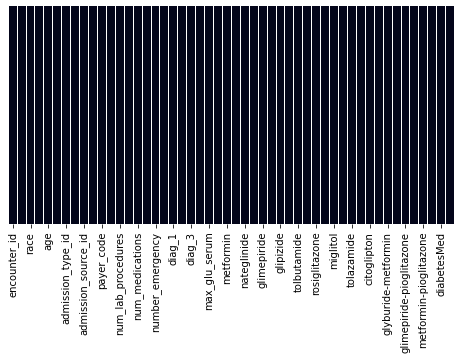

In [ ]:
# setting the figure size for the plt
fig_size = (8,4)
fig, ax = plt.subplots(figsize=fig_size)

# creating a heatmap in sns to visualize the NaN values 
sns.heatmap(diabetes_data.isnull(), yticklabels = False, ax = ax,  cbar = False)


In [ ]:
# creating a list of possible missing values
missing = ['na','?', 'NA','NAN', ' ', 'n/a','--','-','None', 'Unknown/Invalid']

# Using .replace to replace the missing values in the data that's in the defined list
diabetes_data.replace(missing, np.nan, inplace=True)

diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5]), <a list of 25 Text major ticklabel objects>)

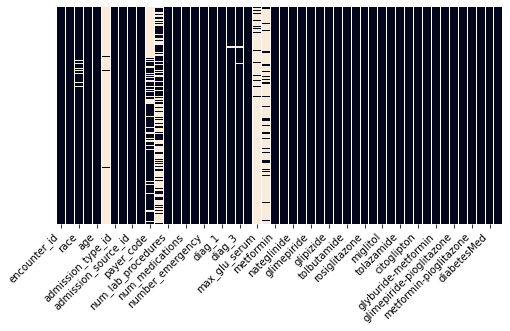

In [ ]:
fig_size = (8,4)
fig, ax = plt.subplots(figsize=fig_size)
sns.heatmap(diabetes_data.isnull(), yticklabels = False, ax =ax, cbar = False)

plt.xticks(rotation = 45, ha = 'right')


In [ ]:
# Assigning the missing values column name to the missing_col 
missing_col = diabetes_data.loc[:, diabetes_data.isnull().any()].columns

# Assigning the amount of missing values to missing_amount
missing_amount = diabetes_data.isnull().sum()

# Creating two empty lists assigned to name and amount to store the name of the missing columns 
# and the number of missing values from that columns 
name = []
amount = []

# Storing the size of the data in the variable size 
size = len(diabetes_data)

# Adding the column name to the list
for element1 in missing_col:
  name.append(element1)
  
# Adding the column percentage to the list
for num in missing_amount:
  if num > 1:
    # Turning the number of missing values into a percentage then rounding it to the second decimal place
    num = round(num/size, 2) * 100
    amount.append(num)

# Creating a dictionary to store the number of missing values with the associated column name. 
name_amount = dict(zip(name, amount))

print(f'The missing columns and the percentage amount of missing values are: {name_amount}')




The missing columns and the percentage amount of missing values are: {'race': 2.0, 'gender': 0.0, 'weight': 97.0, 'payer_code': 40.0, 'medical_specialty': 49.0, 'diag_1': 0.0, 'diag_2': 0.0, 'diag_3': 1.0, 'max_glu_serum': 95.0, 'A1Cresult': 83.0}


#Our data is missing many values in a few columns, how should I proceed? Let’s take a closer look at what each column means.

* Race with 20% missing values that’s not many missing values but I’ll take that into consideration when formulating my questions. 

* Weight has 97% missing values that’s the majority of the data. Unfortunately, I will have to drop this column. 

* Payer_code has 40% missing values. Generally 25%-30% is acceptable for missing values. Payer_code is insurance information that I don’t think I’ll be needing. I’ll be dropping this column as well.

* Medical_specialty with 49% missing values will be dropped. This column contains information on the type of medical professional the patient met with during admission. While that might be an interesting column there are too many missing values to continue our analysis. 

* For Diag_1,2,3 those columns only have less than 1% missing values. That’s okay to continue. 

* I'll also be dropping max_glu_serum at 95% and A1cresult at 83%. While it may be good to know a patient's glucose level. There's just too many missing values.


In [ ]:
# Dropping the columns with high missing values 
diabetes_data2 = diabetes_data.drop(['weight','payer_code','medical_specialty','max_glu_serum','A1Cresult'], axis = 1)

diabetes_data2.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#Can we determine if a patient is more likely to be given a prescription for diabetes given certain variables. 
#My chosen variables are:
 
* The patients gender
* Their age
* The number of lab procedures
* The number of procedures 
* The Number of medications
* The number of outpatient visits
* The number of  inpatient visits
* The number of emergency visits:
* The Number of diagnoses
* Prescribed Diabetes medications 



In [ ]:
# Creating a list for the desired variables 
col = ['race', 'age', 'gender', 	'num_lab_procedures',	'num_procedures',	'num_medications',	'number_outpatient',	'number_emergency',	'number_inpatient','number_diagnoses','diabetesMed']

Meds_diabetes = diabetes_data2[col]

Meds_diabetes.head()

,race,age,gender,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed
0,Caucasian,[0-10),Female,41,0,1,0,0,0,1,No
1,Caucasian,[10-20),Female,59,0,18,0,0,0,9,Yes
2,AfricanAmerican,[20-30),Female,11,5,13,2,0,1,6,Yes
3,Caucasian,[30-40),Male,44,1,16,0,0,0,7,Yes
4,Caucasian,[40-50),Male,51,0,8,0,0,0,5,Yes


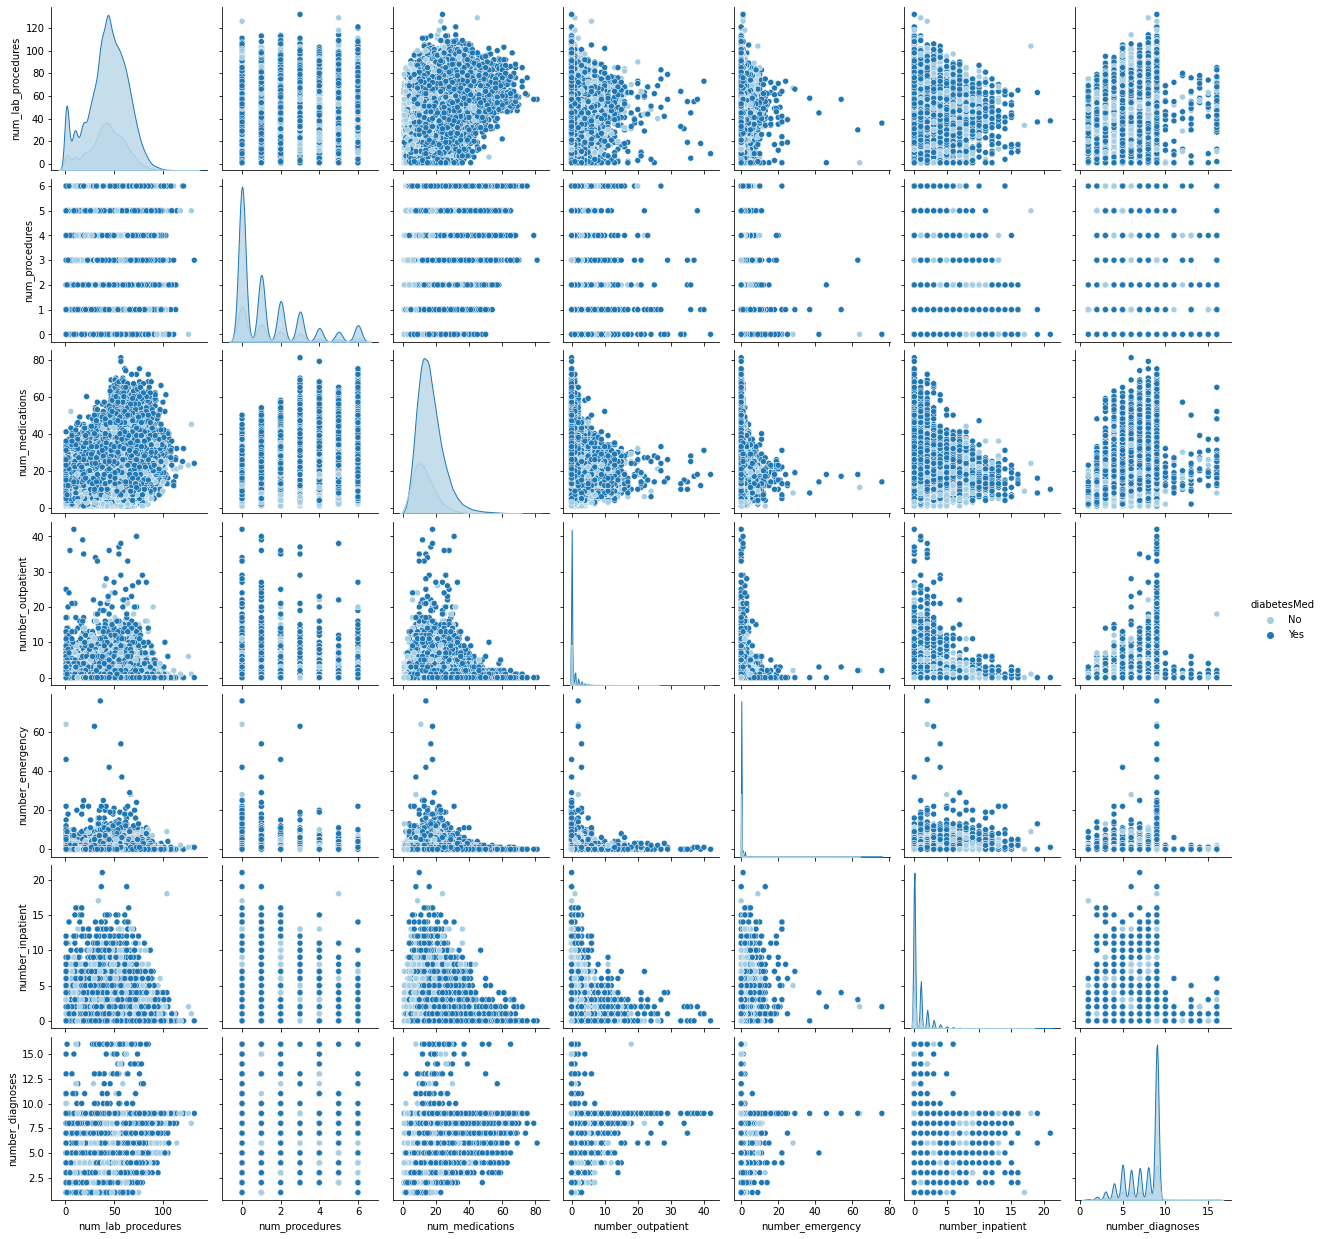

In [ ]:
# Creating a pairplot to show the initial data relationships 
sns.pairplot(data = Meds_diabetes, palette = 'Paired',hue = 'diabetesMed')

#We need to implement feature engineering to our categorical data columns.
###We have 4:
* Race
* Age 
* Gender
* Diabetes med. 

Those columns are nominal. 


In [ ]:
# Counting the values in the race column using .value_count() 
# Then using to_dict() to convert the DataFrame to a dictionary to create a frequency table to display totals.

Meds_diabetes.race.value_counts().to_dict()

{'AfricanAmerican': 19210,
 'Asian': 641,
 'Caucasian': 76099,
 'Hispanic': 2037,
 'Other': 1506}

In [ ]:
Meds_diabetes.age.value_counts().to_dict()

{'[0-10)': 161,
 '[10-20)': 691,
 '[20-30)': 1657,
 '[30-40)': 3775,
 '[40-50)': 9685,
 '[50-60)': 17256,
 '[60-70)': 22483,
 '[70-80)': 26068,
 '[80-90)': 17197,
 '[90-100)': 2793}

In [ ]:
Meds_diabetes.gender.value_counts().to_dict()

{'Female': 54708, 'Male': 47055}

In [ ]:
Meds_diabetes.diabetesMed.value_counts().to_dict()

{'No': 23403, 'Yes': 78363}

#Based on our frequency tables we can see that diabetes med and gender are binary variables. We can fix those and convert those into numerical values first.

In [ ]:
# Replacing the column values to numerical values 
 
Meds_diabetes['diabetesMed'].replace({
    'No':0, 
    'Yes':1, 
    }, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
Meds_diabetes['gender'].replace({
    'Male':0, 
    'Female':1, 
    }, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
Meds_diabetes.head()

,race,age,gender,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed
0,Caucasian,[0-10),1.0,41,0,1,0,0,0,1,0
1,Caucasian,[10-20),1.0,59,0,18,0,0,0,9,1
2,AfricanAmerican,[20-30),1.0,11,5,13,2,0,1,6,1
3,Caucasian,[30-40),0.0,44,1,16,0,0,0,7,1
4,Caucasian,[40-50),0.0,51,0,8,0,0,0,5,1


#Now let’s use dummy variables to deal with race and age

In [ ]:
# Creating a dummy variable but keeping the first column 

df_dummy = pd.get_dummies(Meds_diabetes['race'], drop_first = False)

# Dropping the other column instead of the AfricanAmerican column
df_dummy.drop(['Other'], axis = 1, inplace = True)

df_dummy.head()

,AfricanAmerican,Asian,Caucasian,Hispanic
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
# Concatenate the dummy variable to the existing DataFrame Med_Diabetes 
Meds_diabetes = pd.concat([df_dummy, Meds_diabetes], axis = 1)

# Dropping the race column 
Meds_diabetes.drop(['race'], axis = 1, inplace = True)


Meds_diabetes.head()

,AfricanAmerican,Asian,Caucasian,Hispanic,age,gender,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed
0,0,0,1,0,[0-10),1.0,41,0,1,0,0,0,1,0
1,0,0,1,0,[10-20),1.0,59,0,18,0,0,0,9,1
2,1,0,0,0,[20-30),1.0,11,5,13,2,0,1,6,1
3,0,0,1,0,[30-40),0.0,44,1,16,0,0,0,7,1
4,0,0,1,0,[40-50),0.0,51,0,8,0,0,0,5,1


In [ ]:
df_dummy2 = pd.get_dummies(Meds_diabetes['age'], drop_first = True)

df_dummy2.head()

,[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [ ]:
Meds_diabetes = pd.concat([df_dummy2, Meds_diabetes], axis = 1)

Meds_diabetes.drop('age',axis =1, inplace = True)

Meds_diabetes.head()

,[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),AfricanAmerican,Asian,Caucasian,Hispanic,gender,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed
0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,41,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,59,0,18,0,0,0,9,1
2,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0,11,5,13,2,0,1,6,1
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0,44,1,16,0,0,0,7,1
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,51,0,8,0,0,0,5,1


#Our gender column is a float let's change that.

In [ ]:
#This line fixes the error ValueError: Cannot convert non-finite values (NA or inf) to integer
Meds_diabetes = Meds_diabetes.fillna(0)

#race_diabetes.gender.astype(int)

In [ ]:
Meds_diabetes.head()

,[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),AfricanAmerican,Asian,Caucasian,Hispanic,gender,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed
0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,41,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,59,0,18,0,0,0,9,1
2,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0,11,5,13,2,0,1,6,1
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0,44,1,16,0,0,0,7,1
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,51,0,8,0,0,0,5,1


#Now that I’ve handled my categorical data it's time to preprocess the rest of my data by standardizing the variable.

In [ ]:
# Importing the standardscaler to standardized the dataset to fit the KNN model 

from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating a variable to store the StandardScaler() 

scaler = StandardScaler()

print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


In [ ]:
# Fitting the scaler with the training data 

scaler.fit(Meds_diabetes.drop('diabetesMed', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Transformed the dataset so that each column is standardized individually 

scaled_features = scaler.transform(Meds_diabetes.drop('diabetesMed', axis = 1))

print(scaled_features)
print()
print(type(scaled_features))
print()
print(len(scaled_features))

[[-0.08268318 -0.12865441 -0.19627518 ... -0.21262018 -0.50327619
  -3.3215959 ]
 [12.09435888 -0.12865441 -0.19627518 ... -0.21262018 -0.50327619
   0.81578448]
 [-0.08268318  7.77276088 -0.19627518 ... -0.21262018  0.28857905
  -0.73573316]
 ...
 [-0.08268318 -0.12865441 -0.19627518 ... -0.21262018 -0.50327619
   2.88447467]
 [-0.08268318 -0.12865441 -0.19627518 ... -0.21262018  0.28857905
   0.81578448]
 [-0.08268318 -0.12865441 -0.19627518 ... -0.21262018 -0.50327619
   0.81578448]]

<class 'numpy.ndarray'>

101766


In [ ]:
# Creating a new data frame scaled_data with the standardized values and giving the columns back their names. 

scaled_data = pd.DataFrame(scaled_features, columns = Meds_diabetes.columns[:-1])

scaled_data.head()

,[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),AfricanAmerican,Asian,Caucasian,Hispanic,gender,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,-0.082683,-0.128654,-0.196275,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988,-0.482380,-0.079616,0.580762,-0.142917,0.927452,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596
1,12.094359,-0.128654,-0.196275,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988,-0.482380,-0.079616,0.580762,-0.142917,0.927452,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784
2,-0.082683,7.772761,-0.196275,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988,2.073054,-0.079616,-1.721876,-0.142917,0.927452,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733
3,-0.082683,-0.128654,5.094888,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988,-0.482380,-0.079616,0.580762,-0.142917,-1.078223,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561
4,-0.082683,-0.128654,-0.196275,3.083438,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988,-0.482380,-0.079616,0.580762,-0.142917,-1.078223,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,-1.252906


#Splitting our data

In [ ]:
# The train_test_split() function will split my data rather than me doing it manually 

from sklearn.model_selection import train_test_split

In [ ]:
# Defining our independent(X) and dependent(y) variables

X = scaled_data

y = Meds_diabetes['diabetesMed']

In [ ]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) # setting the test size to 30% 

#KNN 

Train and fit a knn model on the trainning set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import math

Using the sqrt of n to find my k value. If it’s even, I'll make the value odd by subtracting or adding 1 to the answer. 

In [ ]:
# Using the math library to use the  square root function

math.sqrt(len(y_test))

174.72836060582725

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 173)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=173, p=2,
                     weights='uniform')

#Predictions and Evalutions


In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, knn_pred))

[[    7  6920]
 [    6 23597]]


Our Knn model identified
* 7 true positives 
* 23,597 true negatives 
* 6 false positives 
* 6,920 false negatives


In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.54      0.00      0.00      6927
           1       0.77      1.00      0.87     23603

    accuracy                           0.77     30530
   macro avg       0.66      0.50      0.44     30530
weighted avg       0.72      0.77      0.67     30530



##With an f1 score of .67 our model predicated 67% of our positive predictions were correct. 


#Keeping track of my error rate. For multiple k values near the originally selected k. 

Text(0, 0.5, 'Error Rate')

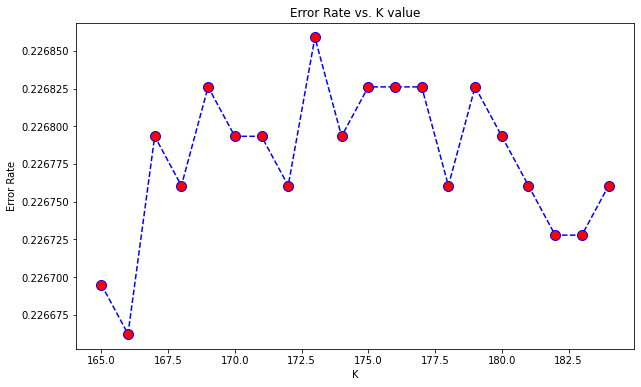

In [ ]:
error_rate =[]

for i in range(165,185):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10,6))
plt.plot(range(165,185), error_rate, color = 'blue', linestyle='dashed', marker='o', markerfacecolor= 'red', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#Testing out a different k values

In [ ]:
knn = KNeighborsClassifier(n_neighbors=170)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print('WITH k = 170')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')

print(classification_report(y_test,pred))

WITH k = 170


[[    9  6918]
 [    6 23597]]


              precision    recall  f1-score   support

           0       0.60      0.00      0.00      6927
           1       0.77      1.00      0.87     23603

    accuracy                           0.77     30530
   macro avg       0.69      0.50      0.44     30530
weighted avg       0.73      0.77      0.67     30530



#Random Forest

Now lets compare our KNN model to a random forest.

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=173)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=173,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[ 1181  5746]
 [ 1887 21716]]


Our Random Forest model identified
* 1,181 true positives 
* 21,716 true negatives 
* 1,887 false positives 
* 5,746 false negatives

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.38      0.17      0.24      6927
           1       0.79      0.92      0.85     23603

    accuracy                           0.75     30530
   macro avg       0.59      0.55      0.54     30530
weighted avg       0.70      0.75      0.71     30530



##With an f1 score of .71 our model predicated 71% of our positive predictions were correct. 


#ICD9 codes

In [ ]:
# lis_1 = diabetes_data.diag_1.unique()
# lis_2 = diabetes_data.diag_2.unique()
# lis_3 = diabetes_data.diag_3.unique()

# lis_4 = []

# for diag1 in lis_1:
#   lis_4.append(diag1)
  
# for diag2 in lis_2:
#   lis_4.append(diag2)
  
# for diag3 in lis_3:
#   lis_4.append(diag3)

# print(lis_4)
# print()
# print(len(lis_1))
# print(len(lis_2))
# print(len(lis_3))

In [ ]:
# ICD9 = set()

# for item in lis_4:
#   ICD9.add(item)

# print(ICD9)
# print()
# print(len(ICD9))